# Parallelisation

C:\Users\lukas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


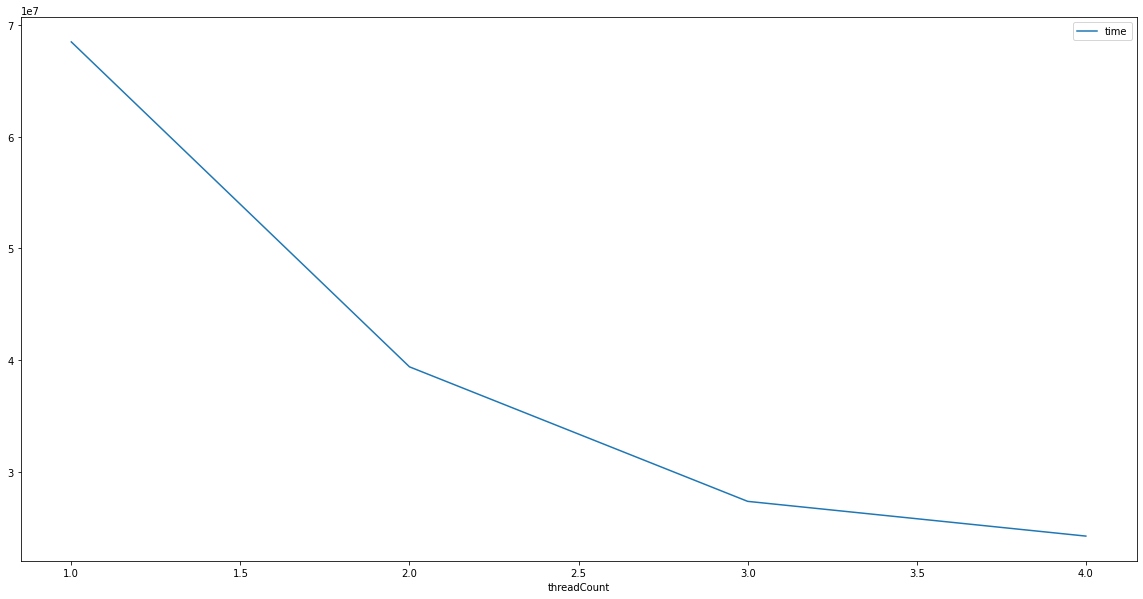

In [27]:
import json
import sys
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
# from datasketch import MinHash, MinHashLSH

plt.rcParams["figure.figsize"] = [20, 10]

thread1 = {'time': (json.load(open("1650274922103862-Tagging of images only total.json", encoding="utf8")))["elapsedTime"], 'threadCount': 1}
thread2 = {'time': (json.load(open("1650274989336800-Tagging of images only total.json", encoding="utf8")))["elapsedTime"], 'threadCount': 2}
thread3 = {'time': (json.load(open("1650275074235943-Tagging of images only total.json", encoding="utf8")))["elapsedTime"], 'threadCount': 3}
thread4 = {'time': (json.load(open("1650275157008042-Tagging of images only total.json", encoding="utf8")))["elapsedTime"], 'threadCount': 4}

# line = np.square(np.array([thread1["time"], thread2["time"], thread3["time"], thread4["time"]]))
df = DataFrame([thread1, thread2, thread3, thread4])
fit = np.polyfit(df["time"], df["threadCount"], 4)
f = np.poly1d(fit)
df.insert(2, 'Treg', f(df["threadCount"]))

plot = df.plot(x="threadCount", y="time")
plot.get_figure().savefig("parallel_image_tagging_temp.png")